In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
df = pd.read_csv('TUANDROMD.csv')
df.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


In [152]:
df.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64

In [153]:
df = df.dropna()
df.isnull().sum()

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Label                                                       0
Length: 242, dtype: int64

In [154]:
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}\n')

X = df.drop('Label', axis=1)
Y = df['Label']

print(Y.unique())
Y.value_counts()

Number of rows: 4464 
Number of columns: 242

['malware' 'goodware']


Label
malware     3565
goodware     899
Name: count, dtype: int64

### Labels in the data

- No artigo os autores dizem que no dataset deles tem 72 labels, onde 71 das labels representam as diferentes familias de malware e a ultima label representa os arquivos benignos.

- No meu caso tenho apenas dois tipos de label, malware e goodware, que vou transformar em 0 e 1, onde 0 representa os arquivos benignos e 1 representa os arquivos maliciosos.

### Number of instances

- No artigo os autores dizem que no dataset deles tem 25,553 instancias, sendo 24,553 malwares e apenas 1000 benignos.

- No meu caso tenho 4464 instancias, sendo 3565 malwares e 899 benignos.


In [155]:
# a nossa label é um caso de classificação binario, então vamos transformar em 0 e 1, goodware & malware respectivamente
Y = Y.map({'malware': 1, 'goodware': 0})
Y.value_counts()

Label
1    3565
0     899
Name: count, dtype: int64

### Number of features: 

- No artigo os autores dizem que extraem 178 features relacionadas com permissões e 186 features relacionadas com APIs.

- No meu caso tenho 241 features, sendo ja um numero abaixo do que os autores do artigo dizem ter. Além disso, não tenho informação sobre quais features estao relacionadas com permissões e APIs. O que me leva a crer que as features que estão em maiusculas são as features relacionadas com permissões e as features que estão em minusculas são as features relacionadas com APIs. Mesmo assim, podendo estar errado, tenho 214 features relacionadas com permissões e 27 features relacionadas com APIs.

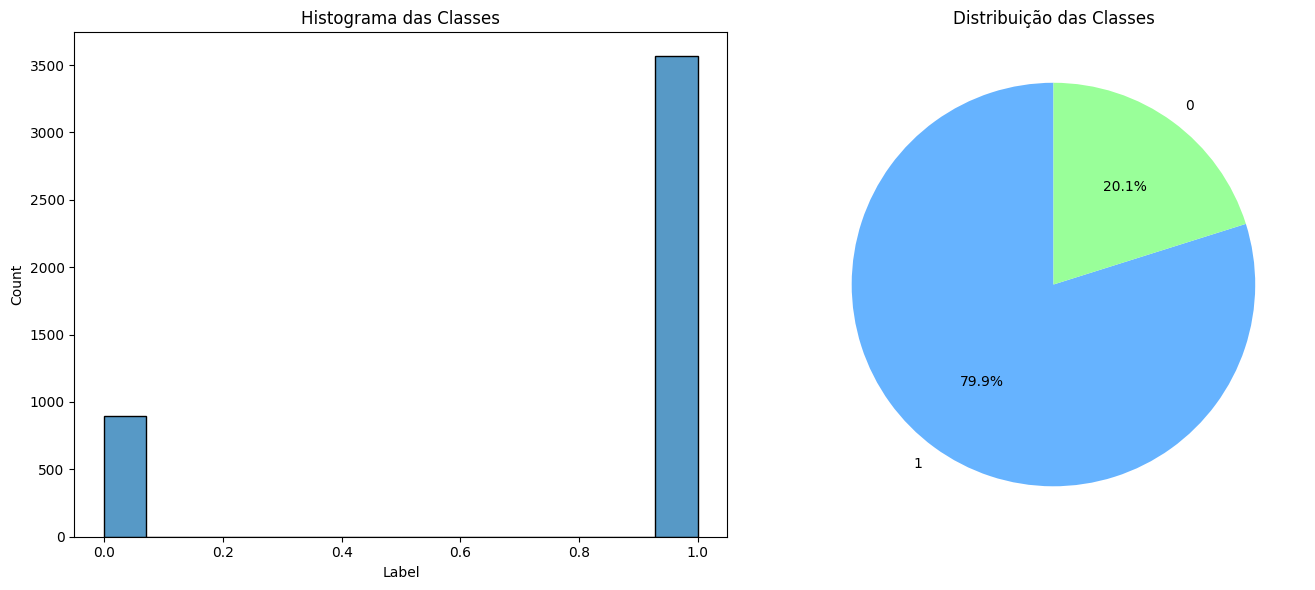

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(Y, ax=ax1)
ax1.set_title('Histograma das Classes')

class_counts = Y.value_counts()
ax2.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
ax2.set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()


### Balance between the classes

- No artigo eles dizem ainda *'The dataset is not perfectly balanced'* quando na realidade em ambos os casos os dataset é altamente desbalanceado, 25 vezes mais malwares do que benignos no dataset dos autores e 4 vezes mais malwares do que benignos no meu dataset.


In [157]:
df['Label'] = df['Label'].map({'malware': 1, 'goodware': 0})


In [158]:
# quero a correlaçao das 20 features mais correlacionadas com a label
corr = df.corr()['Label'].sort_values(ascending=False)
corr = corr.drop('Label')
print(corr.head(15))

RECEIVE_BOOT_COMPLETED                                      0.760417
GET_TASKS                                                   0.563214
WAKE_LOCK                                                   0.472105
KILL_BACKGROUND_PROCESSES                                   0.438312
SYSTEM_ALERT_WINDOW                                         0.281178
DISABLE_KEYGUARD                                            0.257189
READ_PHONE_STATE                                            0.182915
RECEIVE_SMS                                                 0.177635
SEND_SMS                                                    0.172554
READ_SMS                                                    0.123966
CHANGE_WIFI_STATE                                           0.118630
Landroid/telephony/TelephonyManager;->getDeviceId           0.116144
Landroid/telephony/SmsManager;->sendMultipartTextMessage    0.110134
Landroid/telephony/SmsManager;->sendTextMessage             0.099314
CAMERA                            


**LIST OF TOP RANKED FEATURES FOR TUANDROMD**

| Rank | Feature Name                                      |
|------|---------------------------------------------------|
| 1    | SEND_SMS                                          |
| 2    | RECEIVE_BOOT_COMPLETED                            |
| 3    | GET_TASKS                                         |
| 4    | Ljava/net/URL;->openConnection                    |
| 5    | VIBRATE                                           |
| 6    | WAKE_LOCK                                         |
| 7    | KILL_BACKGROUND_PROCESSES                         |
| 8    | SYSTEM_ALERT_WINDOW                               |
| 9    | ACCESS_WIFI_STATE                                 |
| 10   | DISABLE_KEYGUARD                                  |
| 11   | Landroid/location/LocationManager;->getLastKnownLocation |
| 12   | READ_PHONE_STATE                                  |
| 13   | RECEIVE_SMS                                       |
| 14   | CHANGE_WIFI_STATE                                 |
| 15   | WRITE_EXTERNAL_STORAGE                            |

Acima estão as 15 features mais importantes para o modelo do artigo. Apesar de não ter a informação de como chegaram a estas features, por isso fiz a suposiçao que seriam as 15 features mais correlacionadas com a label, mas apos analisar as features mais correlacionadas com a label no meu dataset, percebi que as features mais correlacionadas com a label não são na sua totalidade as mesmas que as features mais importantes para o modelo do artigo.

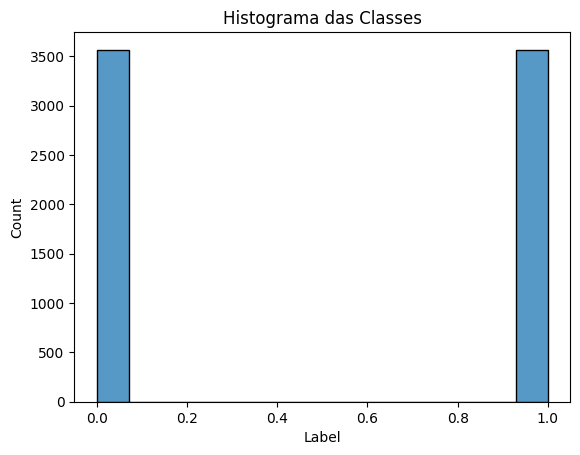

In [159]:
# vou balancear as classes
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X, Y = smote.fit_resample(X, Y)

# Histograma
sns.histplot(Y)
plt.title('Histograma das Classes')
plt.show()

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report


In [161]:
# vou dividir o dataset em 80% para treino e 20% para teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# nao vou normalizar os dados ,porque neste caso nao é necessario porque os valores em todas as features sao binarios, logo nao ha diferença de escala entre as features


In [162]:
def train(model, X_train, X_test, y_train, y_test):
    """ Treina um modelo de classificação e exibe os resultados em formato tabular """
    print("Training Model:", model.__class__.__name__)
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)

    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    
    print("\n" + "="*60) 
    print(f"Resultados do Modelo: {model.__class__.__name__}")
    print("="*60)
    print(f"{'Conjunto':^12} | {'Accuracy':^10} | {'F1 Score':^10} | {'Precision':^10} | {'Recall':^10}")
    print("-"*60)
    print(f"{'Treino':^12} | {train_acc:.4f} | {train_f1:.4f} | {train_precision:.4f} | {train_recall:.4f}")
    print(f"{'Teste':^12} | {test_acc:.4f} | {test_f1:.4f} | {test_precision:.4f} | {test_recall:.4f}")
    print("="*60 + "\n")

    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8,6))
    sns.heatmap(cm_train, annot=True, fmt='d', ax=ax1[0], cmap='Blues')
    ax1[0].set_title('Confusion Matrix (Train Set)')
    ax1[0].set_xlabel('Predicted label')
    ax1[0].set_ylabel('Actual label')
    
    sns.heatmap(cm_test, annot=True, fmt='d', ax=ax1[1], cmap='Blues')
    ax1[1].set_title('Confusion Matrix (Test Set)')
    ax1[1].set_xlabel('Predicted label')
    ax1[1].set_ylabel('Actual label')
    
    ax2[0].plot(fpr, tpr, color='orange', label='ROC (AUC = %0.2f)' % auc(fpr, tpr))
    ax2[0].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    ax2[0].set_xlabel('False Positive Rate')
    ax2[0].set_ylabel('True Positive Rate')
    ax2[0].set_title('ROC Curve')
    ax2[0].legend()
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy'
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    ax2[1].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score", alpha=0.7)
    ax2[1].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score", alpha=0.7)
    ax2[1].set_title("Learning Curve")
    ax2[1].set_xlabel("Training examples")
    ax2[1].set_ylabel("Score")
    ax2[1].legend(loc="best")
    ax2[1].grid()
    
    plt.tight_layout()
    plt.show()



def hyper_parameter(hypertuned_model, hyperparameters, X_train, y_train):
    print("Hyper Parameter Tuning for :", hypertuned_model.__class__.__name__)
    model = GridSearchCV(hypertuned_model, hyperparameters, scoring="accuracy", cv=3)
    model.fit(X_train,y_train)
    print(" Best Params: ", model.best_params_)
    return model.best_params_


def k_fold_cross_validation(model, k, X_train, y_train):
    """ Realiza a validação cruzada K-Fold para um modelo de classificação """
    print("K-Fold Cross Validation for:", model.__class__.__name__)
    
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_validate(model, X_train, y_train, scoring=['accuracy', 'f1', 'precision', 'recall'], cv=k)
    
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_f1 = np.mean(scores['test_f1'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])

    print(f"Accuracy: {mean_accuracy:.4f}")
    print(f"F1 Score: {mean_f1:.4f}")
    print(f"Precision: {mean_precision:.4f}")
    print(f"Recall: {mean_recall:.4f}")
    



### Modelos que vamos usar:
- Random Forest 
- Extra Tree
- Ada Boost 
- Xg Boost 
- Gradient boosting 

Primeiro vou treinar com todas as features, e depois vou treinar com as features mais importantes que foram referenciadas no artigo.

### Random Forest

Training Model: RandomForestClassifier

Resultados do Modelo: RandomForestClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9965 | 0.9966 | 0.9986 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       694
           1       1.00      0.99      1.00       732

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



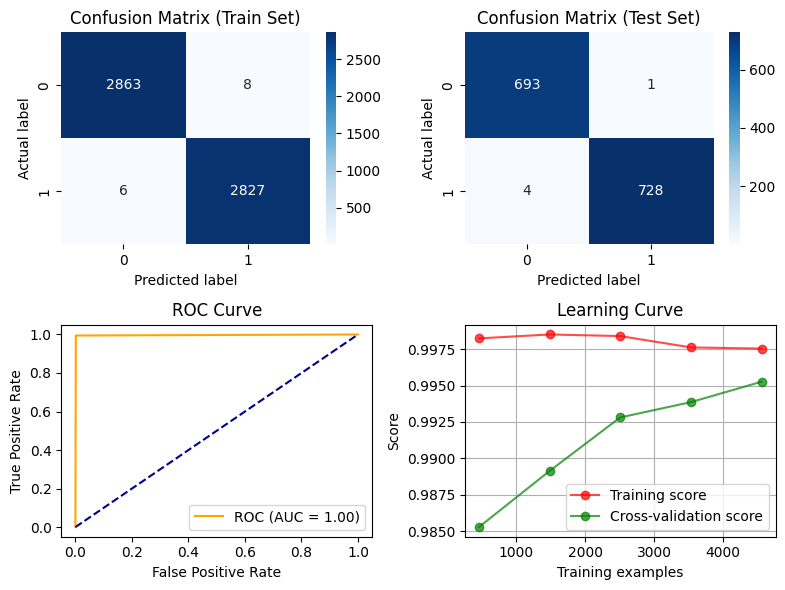

Hyper Parameter Tuning for : RandomForestClassifier
 Best Params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Model: RandomForestClassifier

Resultados do Modelo: RandomForestClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9965 | 0.9966 | 0.9986 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       694
           1       1.00      0.99      1.00       732

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



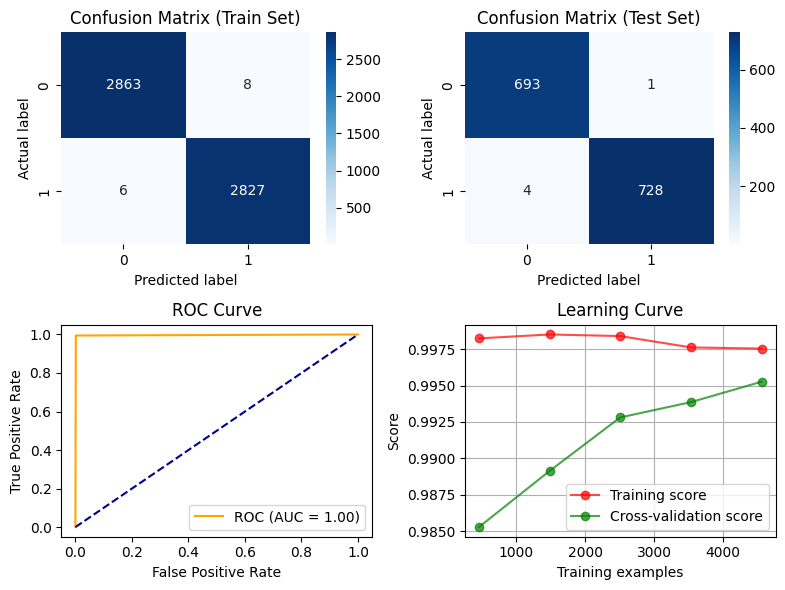

K-Fold Cross Validation for: RandomForestClassifier
Accuracy: 0.9953
F1 Score: 0.9952
Precision: 0.9947
Recall: 0.9958


In [163]:
model = RandomForestClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }

best_params = hyper_parameter(model, hyper_parameters, X_train, Y_train)

model = RandomForestClassifier(random_state=42, **best_params)
train(model, X_train, X_test, Y_train, Y_test)

# K fold cross validation com10 folds como no artigo
k = 10
k_fold_cross_validation(model, k, X_train, Y_train)

### Extra Tree

Training Model: ExtraTreesClassifier

Resultados do Modelo: ExtraTreesClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9965 | 0.9966 | 0.9986 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       694
           1       1.00      0.99      1.00       732

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



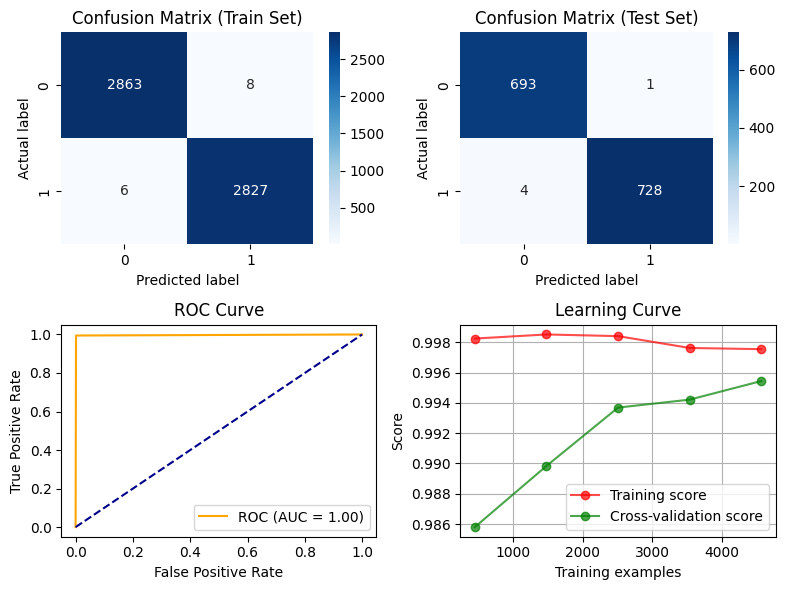

Hyper Parameter Tuning for : ExtraTreesClassifier
 Best Params:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Training Model: ExtraTreesClassifier

Resultados do Modelo: ExtraTreesClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9965 | 0.9966 | 0.9986 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       694
           1       1.00      0.99      1.00       732

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



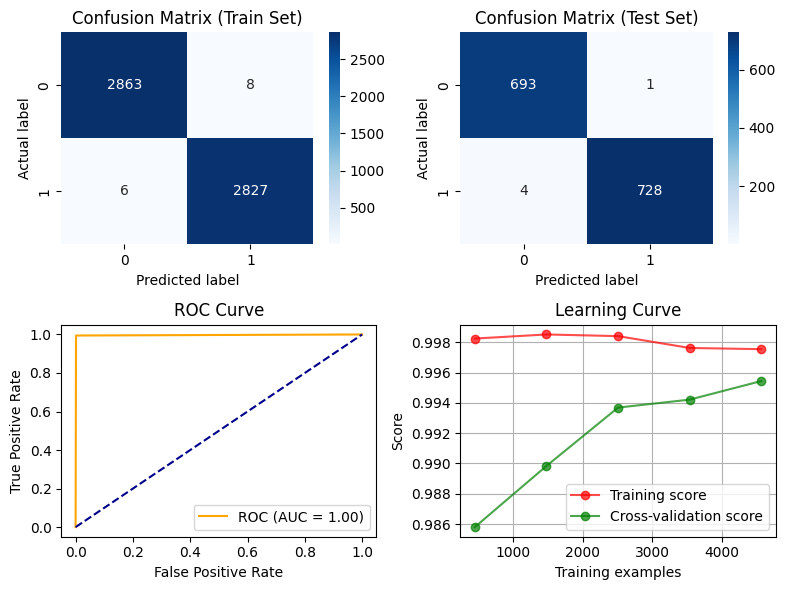

K-Fold Cross Validation for: ExtraTreesClassifier
Accuracy: 0.9961
F1 Score: 0.9961
Precision: 0.9958
Recall: 0.9965


In [164]:
model = ExtraTreesClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_et = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

best_params_et = hyper_parameter(model, hyper_parameters_et, X_train, Y_train)

model = ExtraTreesClassifier(random_state=42, **best_params_et)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Ada Boost

Training Model: AdaBoostClassifier

Resultados do Modelo: AdaBoostClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9881 | 0.9879 | 0.9925 | 0.9834
   Teste     | 0.9818 | 0.9823 | 0.9809 | 0.9836

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       694
           1       0.98      0.98      0.98       732

    accuracy                           0.98      1426
   macro avg       0.98      0.98      0.98      1426
weighted avg       0.98      0.98      0.98      1426



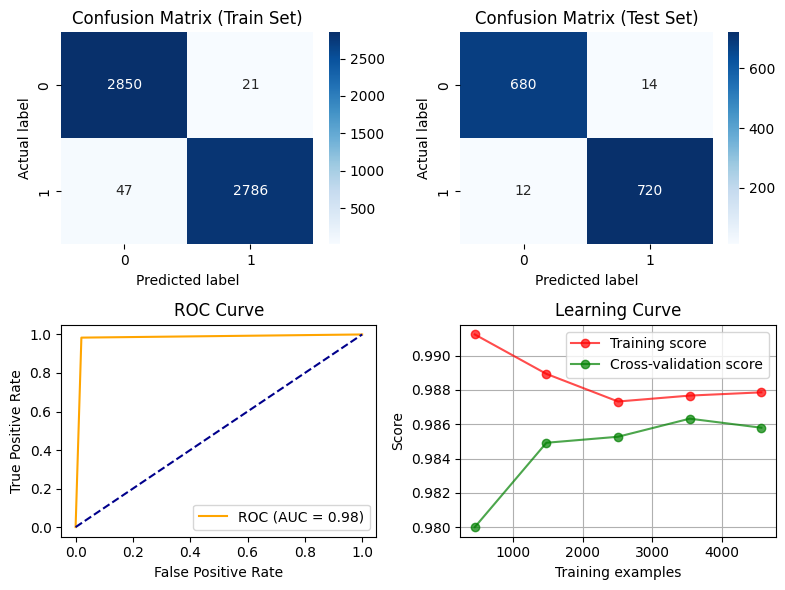

Hyper Parameter Tuning for : AdaBoostClassifier
 Best Params:  {'learning_rate': 1.0, 'n_estimators': 100}
Training Model: AdaBoostClassifier

Resultados do Modelo: AdaBoostClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9911 | 0.9910 | 0.9933 | 0.9887
   Teste     | 0.9846 | 0.9850 | 0.9810 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       694
           1       0.98      0.99      0.99       732

    accuracy                           0.98      1426
   macro avg       0.98      0.98      0.98      1426
weighted avg       0.98      0.98      0.98      1426



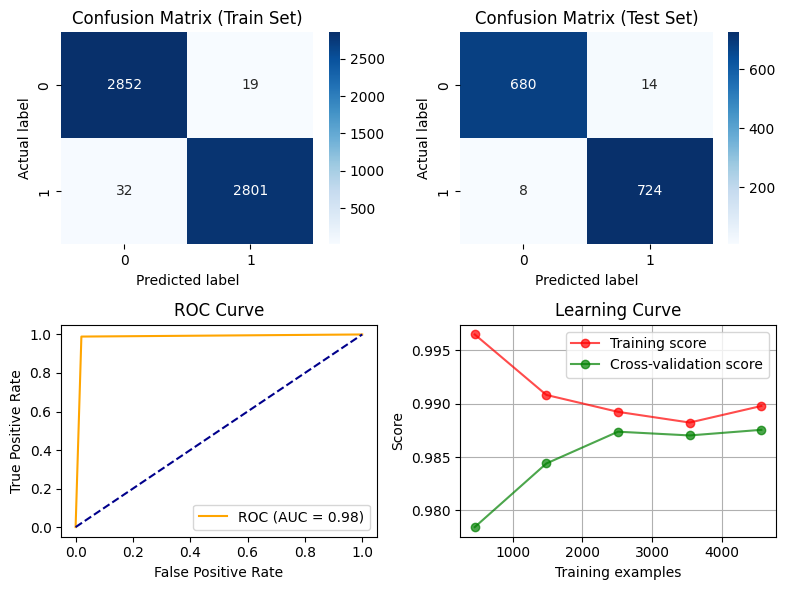

K-Fold Cross Validation for: AdaBoostClassifier
Accuracy: 0.9888
F1 Score: 0.9887
Precision: 0.9912
Recall: 0.9862


In [165]:

model = AdaBoostClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0]
}

best_params_ada = hyper_parameter(model, hyper_parameters_ada, X_train, Y_train)

model = AdaBoostClassifier(random_state=42, **best_params_ada)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Xg Boost

Training Model: XGBClassifier

Resultados do Modelo: XGBClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9937 | 0.9939 | 0.9932 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



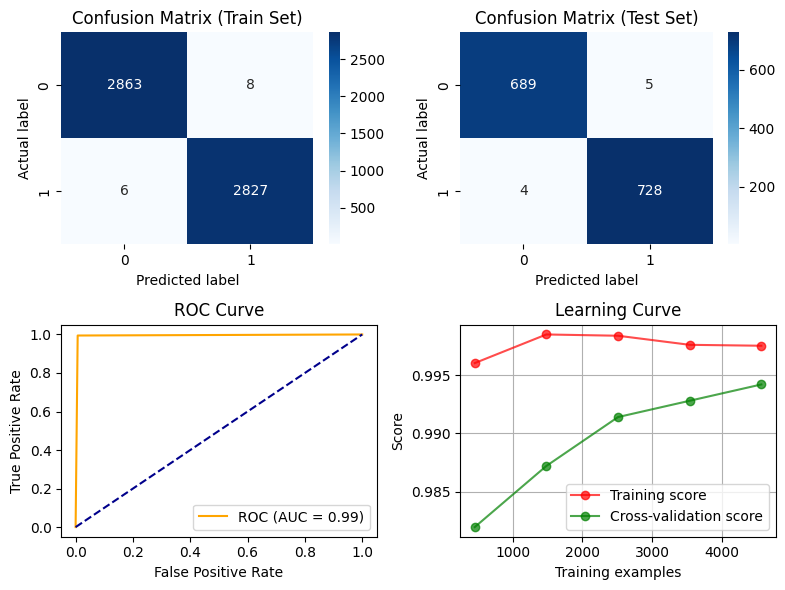

Hyper Parameter Tuning for : XGBClassifier
 Best Params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Training Model: XGBClassifier

Resultados do Modelo: XGBClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9937 | 0.9939 | 0.9932 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



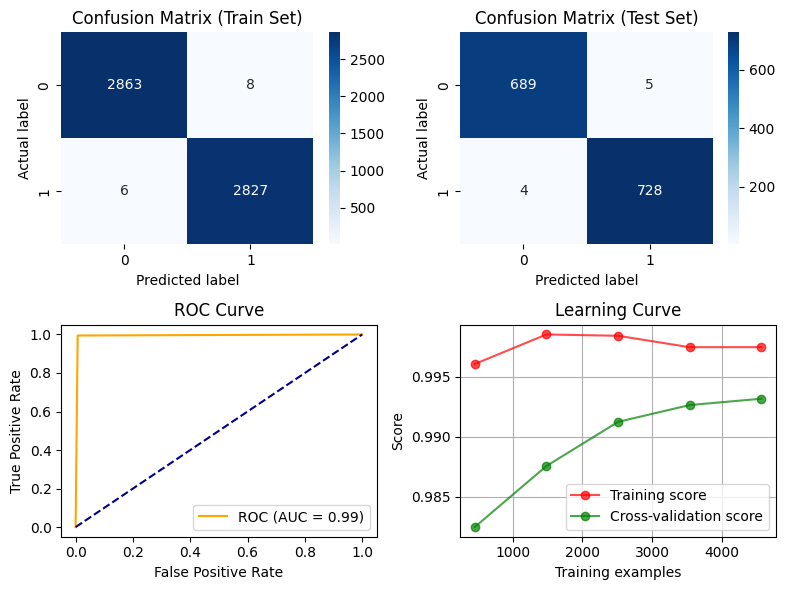

K-Fold Cross Validation for: XGBClassifier
Accuracy: 0.9942
F1 Score: 0.9942
Precision: 0.9926
Recall: 0.9958


In [166]:
model = xgb.XGBClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

best_params_xgb = hyper_parameter(model, hyper_parameters_xgb, X_train, Y_train)

model = xgb.XGBClassifier(random_state=42, **best_params_xgb)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Gradient Boosting

Training Model: GradientBoostingClassifier

Resultados do Modelo: GradientBoostingClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9932 | 0.9931 | 0.9979 | 0.9884
   Teste     | 0.9895 | 0.9897 | 0.9904 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



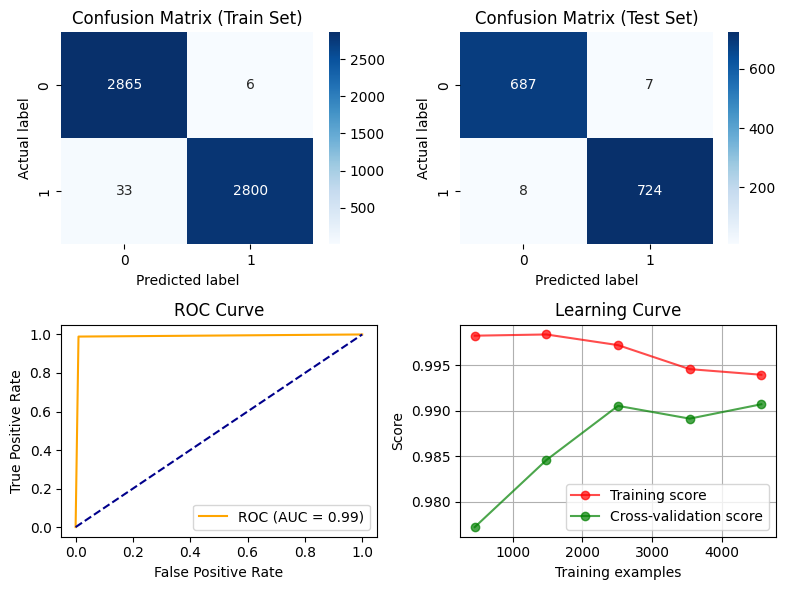

Hyper Parameter Tuning for : GradientBoostingClassifier
 Best Params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Training Model: GradientBoostingClassifier

Resultados do Modelo: GradientBoostingClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9975 | 0.9975 | 0.9972 | 0.9979
   Teste     | 0.9951 | 0.9952 | 0.9959 | 0.9945

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       694
           1       1.00      0.99      1.00       732

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426



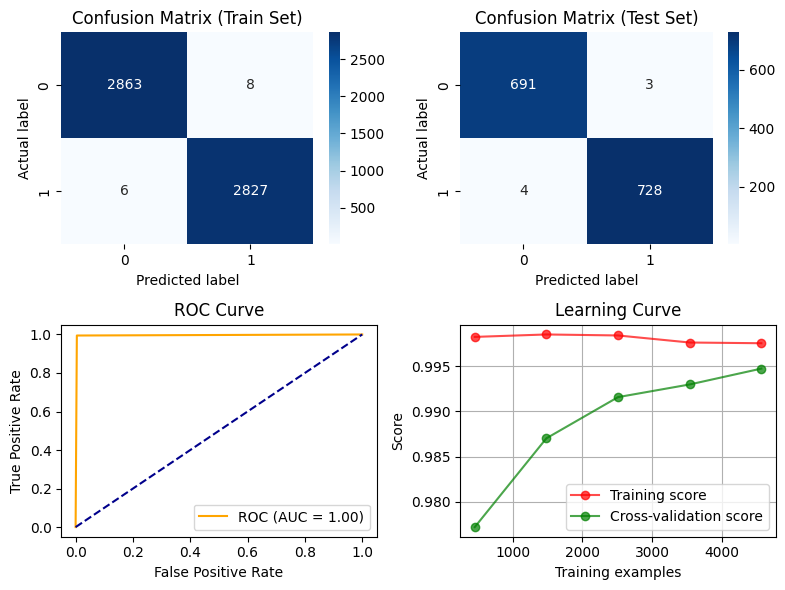

K-Fold Cross Validation for: GradientBoostingClassifier
Accuracy: 0.9953
F1 Score: 0.9952
Precision: 0.9940
Recall: 0.9965


In [167]:
model = GradientBoostingClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

best_params_gb = hyper_parameter(model, hyper_parameters_gb, X_train, Y_train)

model = GradientBoostingClassifier(random_state=42, **best_params_gb)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)

### Agora vou treinar com as features mais importantes apenas

In [168]:

features = ['SEND_SMS', 'RECEIVE_BOOT_COMPLETED', 'GET_TASKS', 'Ljava/net/URL;->openConnection', 'VIBRATE', 'WAKE_LOCK', 'KILL_BACKGROUND_PROCESSES', 'SYSTEM_ALERT_WINDOW', 'ACCESS_WIFI_STATE', 'DISABLE_KEYGUARD', 'READ_PHONE_STATE', 'RECEIVE_SMS', 'CHANGE_WIFI_STATE', 'WRITE_EXTERNAL_STORAGE']

X_selected = X[features]
# vou dividir o dataset em 80% para treino e 20% para teste
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

# vou normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Nao pude usar a seguinte feature porque nao existe no nosso daatset:
- Landroid/location/LocationManager;->getLastKnownLocation

### Random Forest (features mais importantes)

Training Model: RandomForestClassifier

Resultados do Modelo: RandomForestClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9935 | 0.9934 | 0.9986 | 0.9884
   Teste     | 0.9923 | 0.9925 | 0.9959 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       694
           1       1.00      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



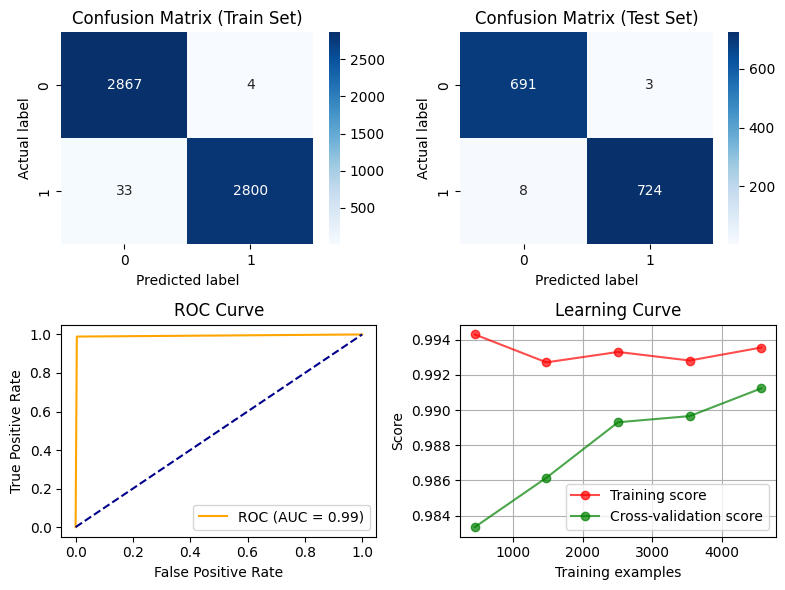

Hyper Parameter Tuning for : RandomForestClassifier
 Best Params:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Training Model: RandomForestClassifier

Resultados do Modelo: RandomForestClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9935 | 0.9934 | 0.9986 | 0.9884
   Teste     | 0.9930 | 0.9931 | 0.9972 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       694
           1       1.00      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



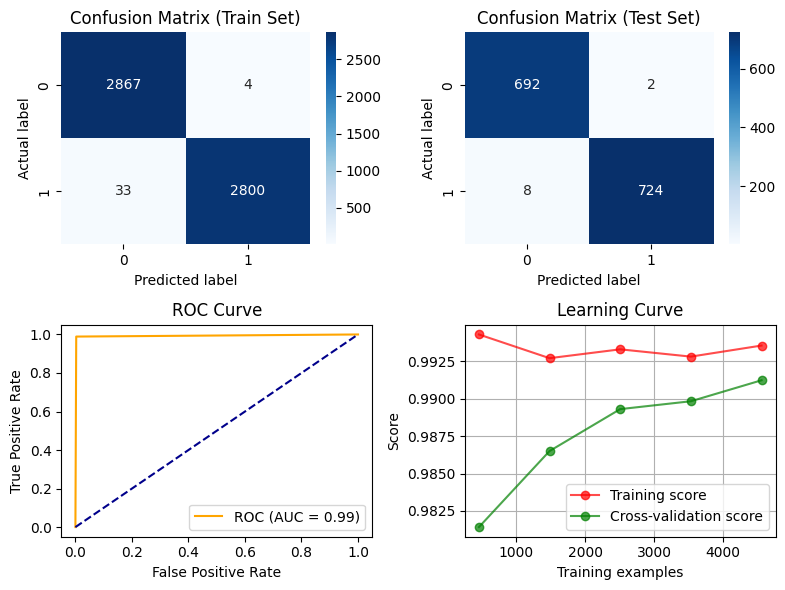

K-Fold Cross Validation for: RandomForestClassifier
Accuracy: 0.9914
F1 Score: 0.9913
Precision: 0.9950
Recall: 0.9877


In [169]:
model = RandomForestClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }

best_params = hyper_parameter(model, hyper_parameters, X_train, Y_train)

model = RandomForestClassifier(random_state=42, **best_params)
train(model, X_train, X_test, Y_train, Y_test)

# K fold cross validation com10 folds como no artigo
k = 10
k_fold_cross_validation(model, k, X_train, Y_train)

### Extra Tree (features mais importantes)

Training Model: ExtraTreesClassifier

Resultados do Modelo: ExtraTreesClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9935 | 0.9934 | 0.9986 | 0.9884
   Teste     | 0.9930 | 0.9931 | 0.9972 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       694
           1       1.00      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



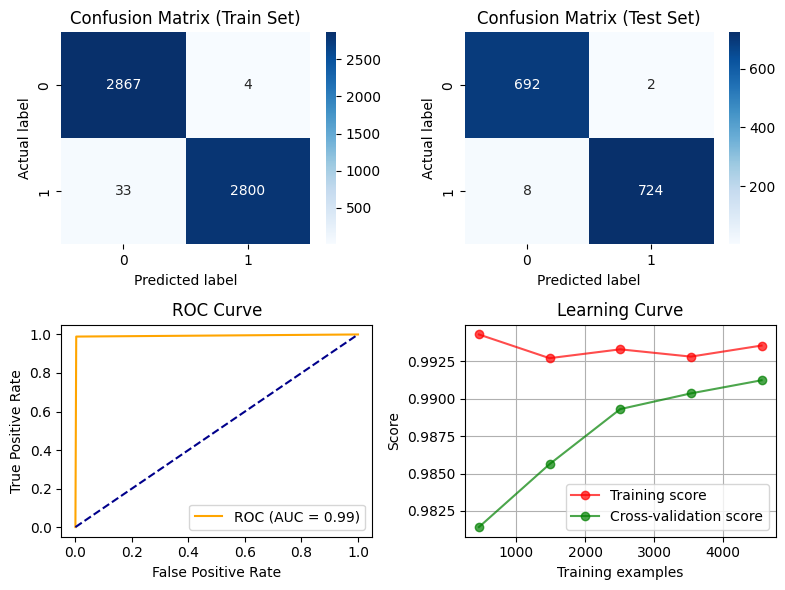

Hyper Parameter Tuning for : ExtraTreesClassifier
 Best Params:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Training Model: ExtraTreesClassifier

Resultados do Modelo: ExtraTreesClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9935 | 0.9934 | 0.9986 | 0.9884
   Teste     | 0.9930 | 0.9931 | 0.9972 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       694
           1       1.00      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



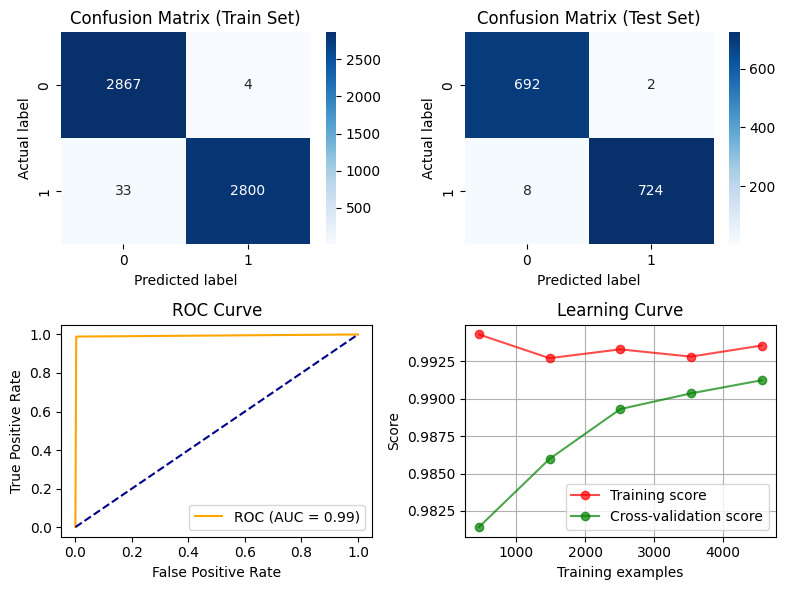

K-Fold Cross Validation for: ExtraTreesClassifier
Accuracy: 0.9919
F1 Score: 0.9918
Precision: 0.9964
Recall: 0.9873


In [170]:
model = ExtraTreesClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_et = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

best_params_et = hyper_parameter(model, hyper_parameters_et, X_train, Y_train)

model = ExtraTreesClassifier(random_state=42, **best_params_et)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Ada Boost (features mais importantes)

Training Model: AdaBoostClassifier

Resultados do Modelo: AdaBoostClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9826 | 0.9825 | 0.9851 | 0.9799
   Teste     | 0.9846 | 0.9850 | 0.9823 | 0.9877

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       694
           1       0.98      0.99      0.99       732

    accuracy                           0.98      1426
   macro avg       0.98      0.98      0.98      1426
weighted avg       0.98      0.98      0.98      1426



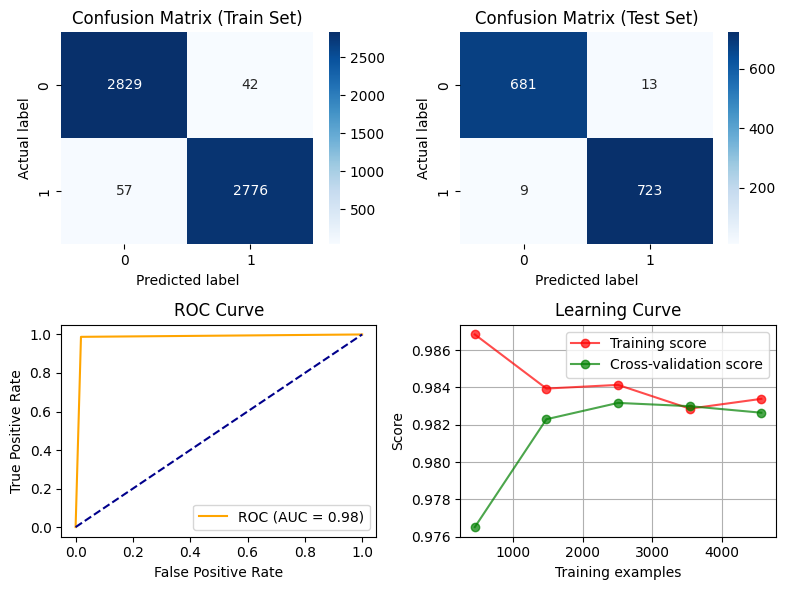

Hyper Parameter Tuning for : AdaBoostClassifier
 Best Params:  {'learning_rate': 1.0, 'n_estimators': 50}
Training Model: AdaBoostClassifier

Resultados do Modelo: AdaBoostClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9826 | 0.9825 | 0.9851 | 0.9799
   Teste     | 0.9846 | 0.9850 | 0.9823 | 0.9877

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       694
           1       0.98      0.99      0.99       732

    accuracy                           0.98      1426
   macro avg       0.98      0.98      0.98      1426
weighted avg       0.98      0.98      0.98      1426



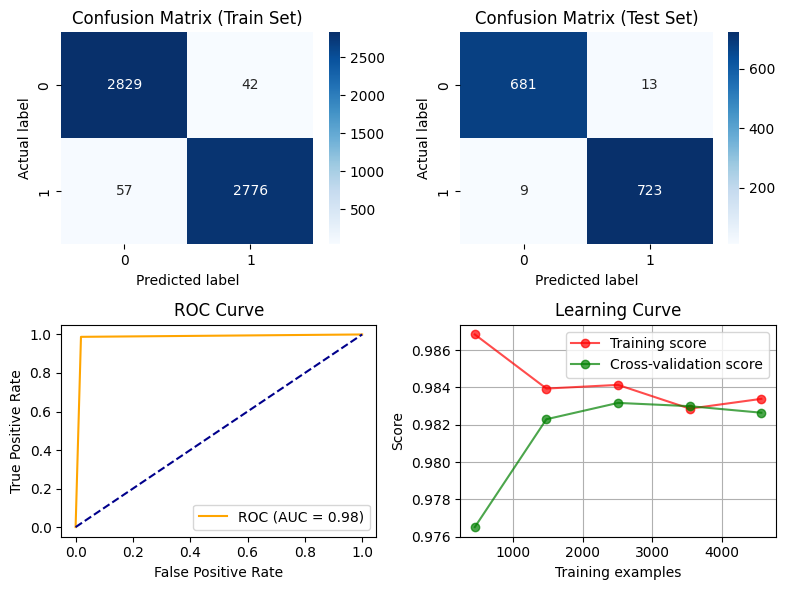

K-Fold Cross Validation for: AdaBoostClassifier
Accuracy: 0.9828
F1 Score: 0.9826
Precision: 0.9855
Recall: 0.9799


In [171]:

model = AdaBoostClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0]
}

best_params_ada = hyper_parameter(model, hyper_parameters_ada, X_train, Y_train)

model = AdaBoostClassifier(random_state=42, **best_params_ada)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Xg Boost (features mais importantes)

Training Model: XGBClassifier

Resultados do Modelo: XGBClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9933 | 0.9933 | 0.9982 | 0.9884
   Teste     | 0.9902 | 0.9904 | 0.9918 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



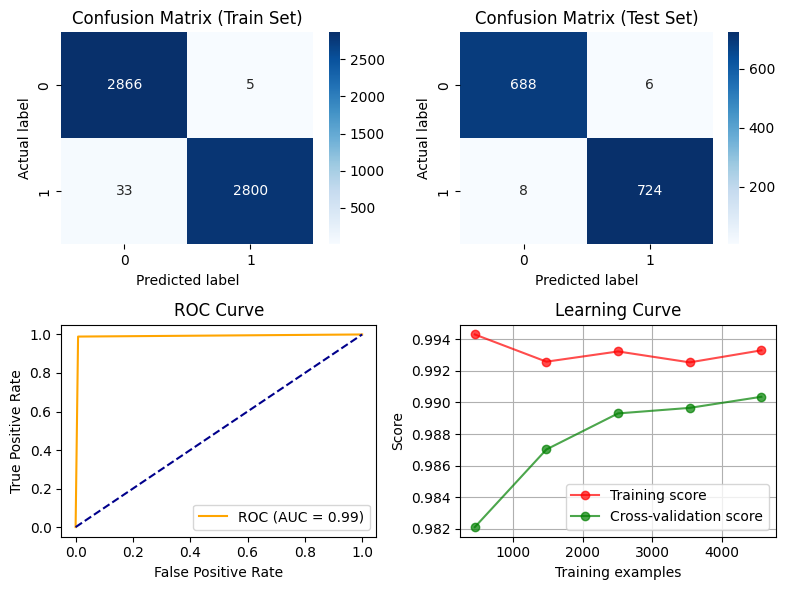

Hyper Parameter Tuning for : XGBClassifier
 Best Params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Training Model: XGBClassifier

Resultados do Modelo: XGBClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9919 | 0.9918 | 0.9968 | 0.9869
   Teste     | 0.9895 | 0.9897 | 0.9904 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



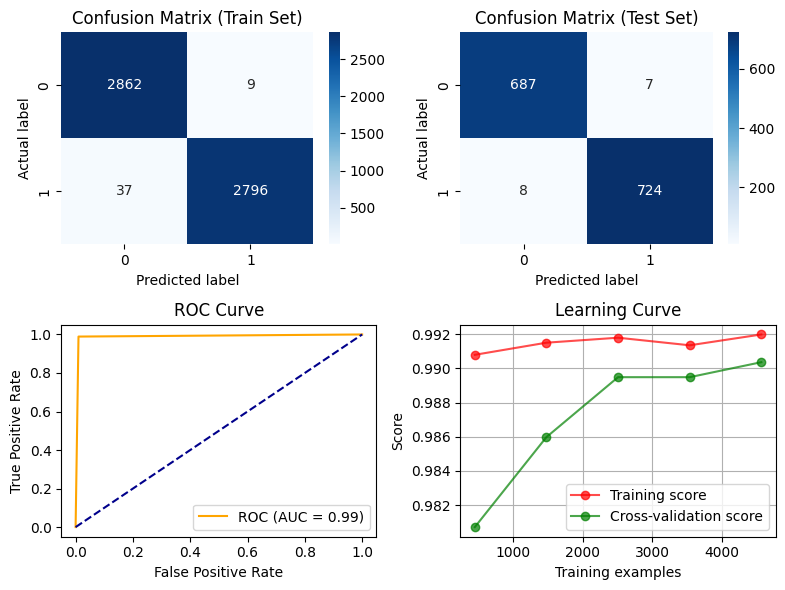

K-Fold Cross Validation for: XGBClassifier
Accuracy: 0.9907
F1 Score: 0.9906
Precision: 0.9947
Recall: 0.9866


In [172]:
model = xgb.XGBClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

best_params_xgb = hyper_parameter(model, hyper_parameters_xgb, X_train, Y_train)

model = xgb.XGBClassifier(random_state=42, **best_params_xgb)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)


### Gradient Boosting (features mais importantes)

Training Model: GradientBoostingClassifier

Resultados do Modelo: GradientBoostingClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9918 | 0.9917 | 0.9957 | 0.9876
   Teste     | 0.9888 | 0.9891 | 0.9891 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



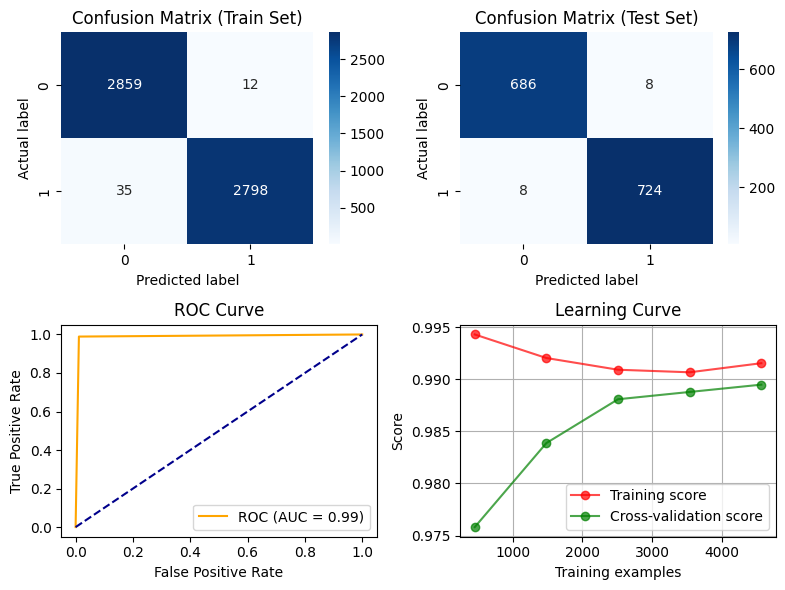

Hyper Parameter Tuning for : GradientBoostingClassifier
 Best Params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Training Model: GradientBoostingClassifier

Resultados do Modelo: GradientBoostingClassifier
  Conjunto   |  Accuracy  |  F1 Score  | Precision  |   Recall  
------------------------------------------------------------
   Treino    | 0.9935 | 0.9934 | 0.9986 | 0.9884
   Teste     | 0.9916 | 0.9918 | 0.9945 | 0.9891

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       694
           1       0.99      0.99      0.99       732

    accuracy                           0.99      1426
   macro avg       0.99      0.99      0.99      1426
weighted avg       0.99      0.99      0.99      1426



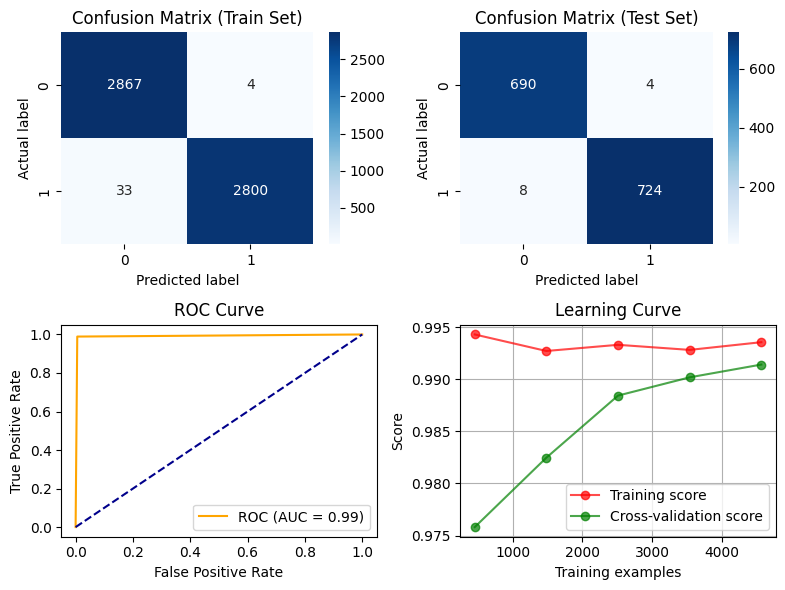

K-Fold Cross Validation for: GradientBoostingClassifier
Accuracy: 0.9914
F1 Score: 0.9913
Precision: 0.9950
Recall: 0.9877


In [173]:
model = GradientBoostingClassifier(random_state=42)
train(model, X_train, X_test, Y_train, Y_test)

hyper_parameters_gb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

best_params_gb = hyper_parameter(model, hyper_parameters_gb, X_train, Y_train)

model = GradientBoostingClassifier(random_state=42, **best_params_gb)
train(model, X_train, X_test, Y_train, Y_test)

k = 10
k_fold_cross_validation(model, k, X_train, Y_train)